# Few-shot learning on 11 datasets

## Draw .svg figures

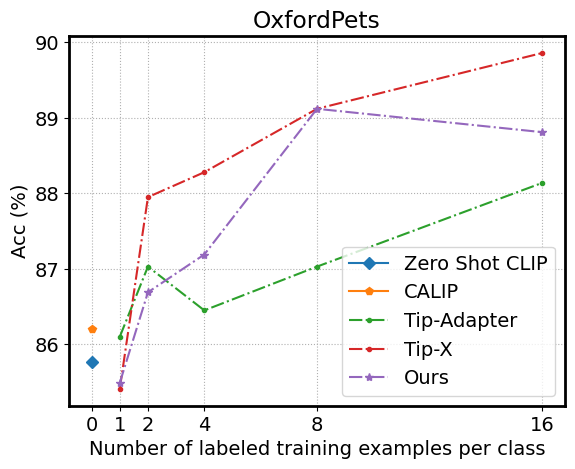

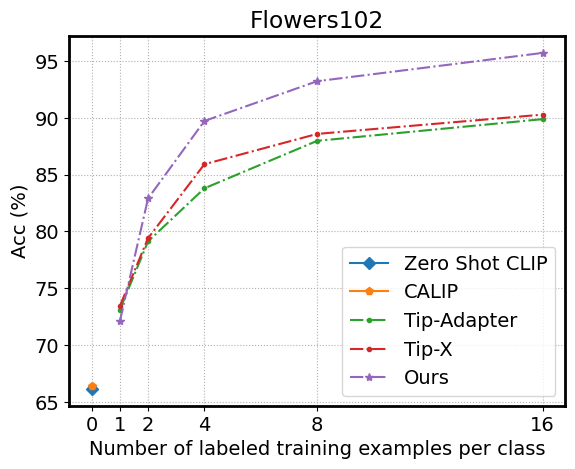

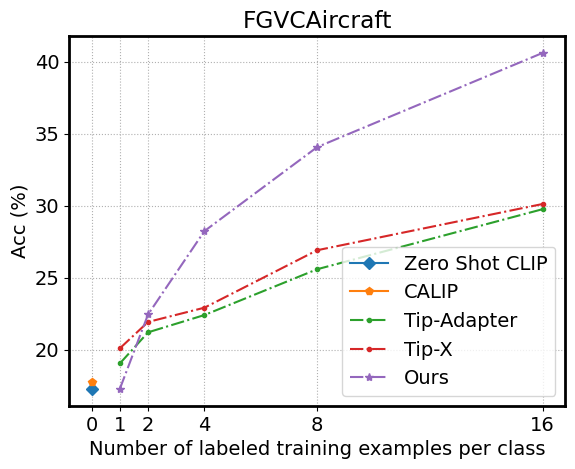

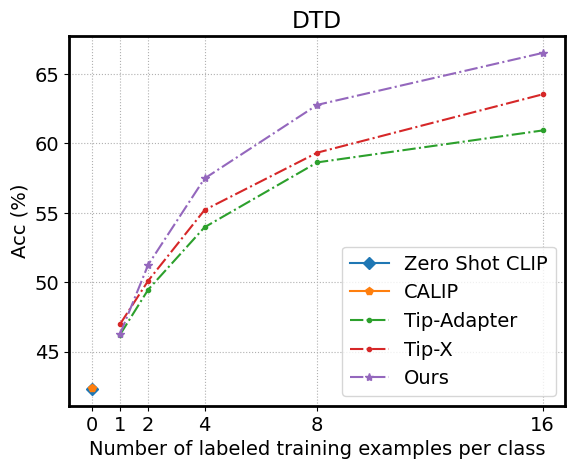

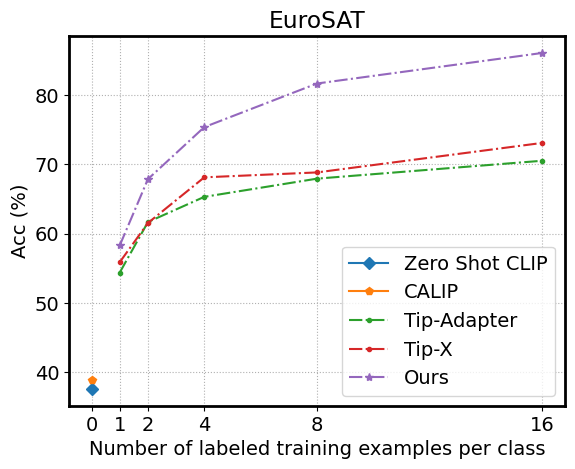

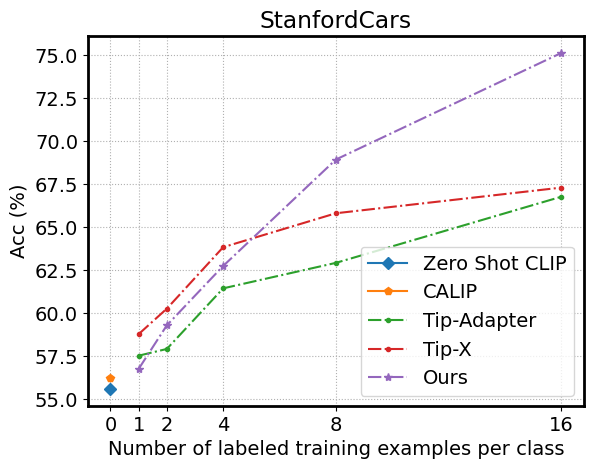

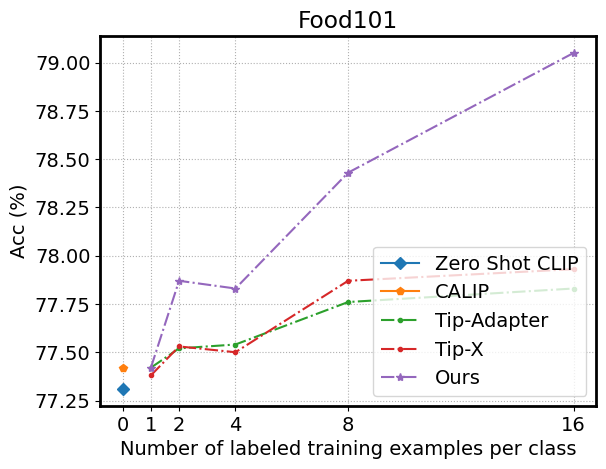

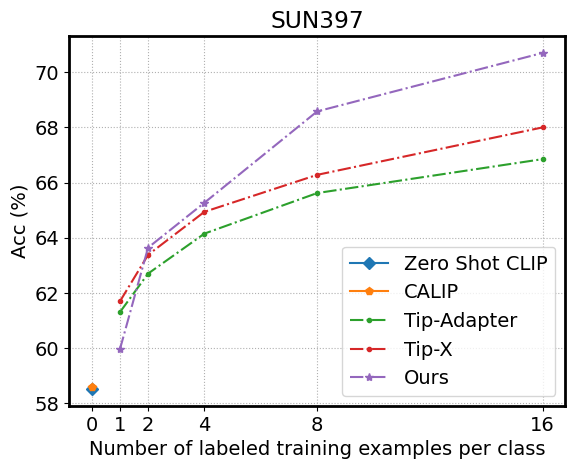

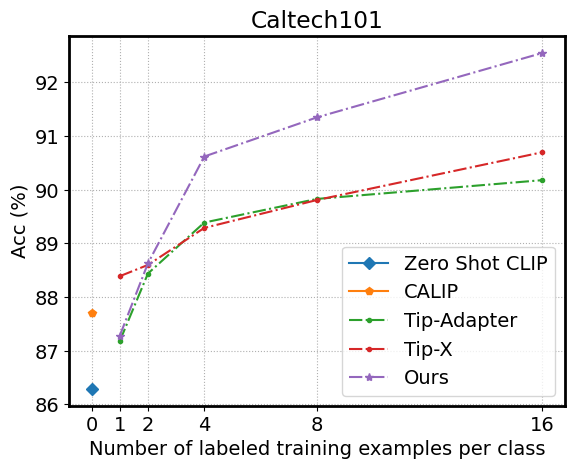

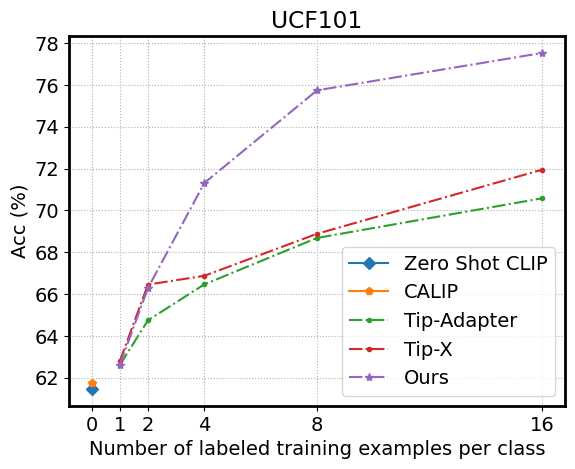

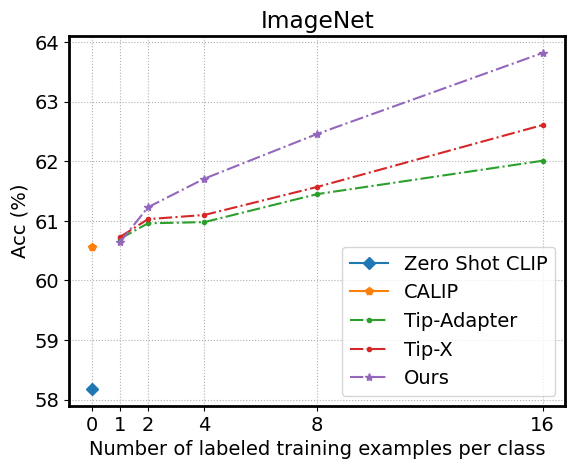

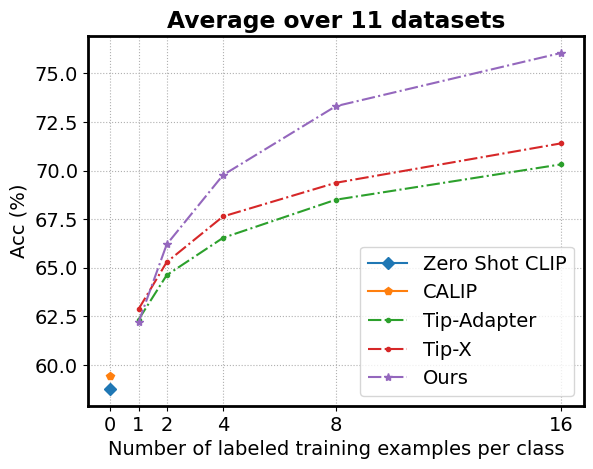

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch
import numpy as np
plt.rcParams.update({'font.size': 14})

# Zero-Shot
zero_shot = [85.77, 66.14, 17.28, 42.32, 37.56,
             55.61, 77.31, 58.52, 86.29, 61.46, 58.18, 58.77]

CALIP = [86.21, 66.38, 17.76, 42.39, 38.90, 56.27, 77.42, 58.59, 87.71, 61.72, 60.57, 59.45]

# Tip
Tip_1 = [86.10, 73.12, 19.05, 46.22, 54.38, 57.54, 77.42, 61.30, 87.18, 62.60, 60.70, 62.33]
Tip_2 = [87.03, 79.13, 21.21, 49.47, 61.68, 57.93, 77.52, 62.70, 88.44, 64.74, 60.96, 64.62]
Tip_4 = [86.45, 83.80, 22.41, 53.96, 65.32, 61.45, 77.54, 64.15, 89.39, 66.46, 60.98, 66.54]
Tip_8 = [87.03, 87.98, 25.59, 58.63, 67.95, 62.93, 77.76, 65.62, 89.83, 68.68, 61.45, 68.50]
Tip_16 = [88.14, 89.89, 29.76, 60.93, 70.54, 66.77, 77.83, 66.85, 90.18, 70.58, 62.01, 70.32]
Tip = [Tip_1, Tip_2, Tip_4, Tip_8, Tip_16]

# Tip-X
Tip_X_1 = [85.41, 73.44, 20.10, 46.98, 55.88, 58.79, 77.38, 61.69, 88.39, 62.78, 60.73, 62.87]
Tip_X_2 = [87.95, 79.41, 21.93, 50.11, 61.54, 60.27, 77.53, 63.38, 88.60, 66.45, 61.03, 65.29]
Tip_X_4 = [88.28, 85.92, 22.92, 55.20, 68.14, 63.84, 77.50, 64.94, 89.29, 66.87, 61.10, 67.64]
Tip_X_8 = [89.12, 88.59, 26.91, 59.33, 68.85, 65.81, 77.87, 66.28, 89.81, 68.88, 61.57, 69.37]
Tip_X_16 = [89.86, 90.29, 30.12, 63.53, 73.12, 67.30, 77.93, 68.00, 90.70, 71.95, 62.61, 71.40]
Tip_X = [Tip_X_1, Tip_X_2, Tip_X_4, Tip_X_8, Tip_X_16]

# ours
ours_1 = [85.49, 72.11, 17.29, 46.26, 58.30, 56.77, 77.42, 59.95, 87.28, 62.61, 60.64, 62.19]
ours_2 = [86.69, 82.91, 22.45, 51.26, 67.88, 59.30, 77.87, 63.64, 88.63, 66.28, 61.23, 66.20]
ours_4 = [87.19, 89.73, 28.24, 57.47, 75.40, 62.75, 77.83, 65.27, 90.62, 71.31, 61.71, 69.77]
ours_8 = [89.12, 93.23, 34.07, 62.77, 81.70, 68.93, 78.43, 68.58, 91.35, 75.74, 62.46, 73.31]
ours_16 = [88.81, 95.72, 40.61, 66.51, 86.12, 75.12, 79.05, 70.70, 92.55, 77.53, 63.82, 76.05]
ours = [ours_1, ours_2, ours_4, ours_8, ours_16]

# 画图.
for idx in range(0, 12):
    X0 = [0]
    X = [1, 2, 4, 8, 16]

    titles = ["OxfordPets", "Flowers102", "FGVCAircraft", "DTD", "EuroSAT",
              "StanfordCars", "Food101", "SUN397", "Caltech101", "UCF101", "ImageNet", "Average over 11 datasets"]

    fig = plt.figure()
    ax = plt.gca()

    # draw zero-shot
    plt.plot(X0, zero_shot[idx], marker='D', label='Zero Shot CLIP')
    
    # draw CALIP
    plt.plot(X0, CALIP[idx], marker='p', label='CALIP')

    # draw tip
    tip = [Tip[i][idx] for i in range(5)]
    plt.plot(X, tip, marker='.', label='Tip-Adapter', linestyle='-.')
    
    # draw tip-x
    tip_x = [Tip_X[i][idx] for i in range(5)]
    plt.plot(X, tip_x, marker='.', label='Tip-X', linestyle='-.')

    # draw ours
    our = [ours[i][idx] for i in range(5)]
    plt.plot(X, our, marker='*', label='Ours', linestyle='-.')

    # other setting
    plt.legend(loc='lower right')
    if titles[idx] == "Average over 11 datasets":
        plt.title(titles[idx], fontweight="bold")
    else:
        plt.title(titles[idx])
    
    plt.grid(True, linestyle=':')
    plt.xlabel('Number of labeled training examples per class')
    plt.ylabel('Acc (%)')
    plt.xticks([0, 1, 2, 4, 8, 16])
    ax.spines['bottom'].set_linewidth(2.0) #设置边框线宽为2.0
    ax.spines['left'].set_linewidth(2.0) #设置边框线宽为2.0
    ax.spines['top'].set_linewidth(2.0) #设置边框线宽为2.0
    ax.spines['right'].set_linewidth(2.0) #设置边框线宽为2.0
    plt.show()

## ImageNet more shots 

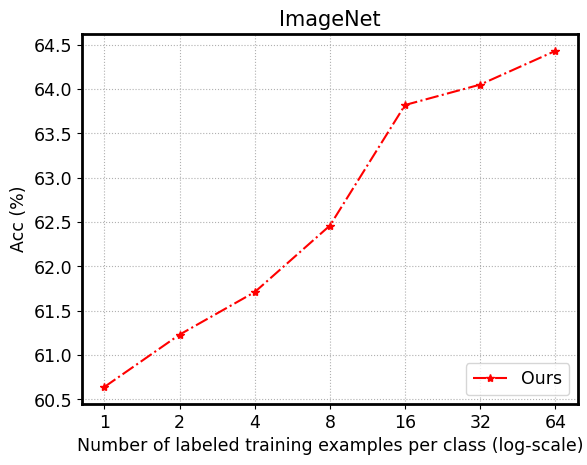

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch
import numpy as np
import math
plt.rcParams.update({'font.size': 12.5})

X = [math.log(1), math.log(2), math.log(4), math.log(8), math.log(16), math.log(32), math.log(64)]
Y = [60.64, 61.23, 61.71, 62.46, 63.82, 64.05, 64.43]

fig = plt.figure()
ax = plt.gca()
plt.plot(X, Y, marker='*', label='Ours', linestyle='-.', c='r')

plt.grid(True, linestyle=':')
plt.xlabel('Number of labeled training examples per class (log-scale)')
plt.ylabel('Acc (%)')
plt.xticks(ticks=X, labels=[1, 2, 4, 8, 16, 32, 64])

plt.title("ImageNet")
plt.legend(loc='lower right')
ax.spines['bottom'].set_linewidth(2.0) #设置边框线宽为2.0
ax.spines['left'].set_linewidth(2.0) #设置边框线宽为2.0
ax.spines['top'].set_linewidth(2.0) #设置边框线宽为2.0
ax.spines['right'].set_linewidth(2.0) #设置边框线宽为2.0

plt.show()

## Ablation

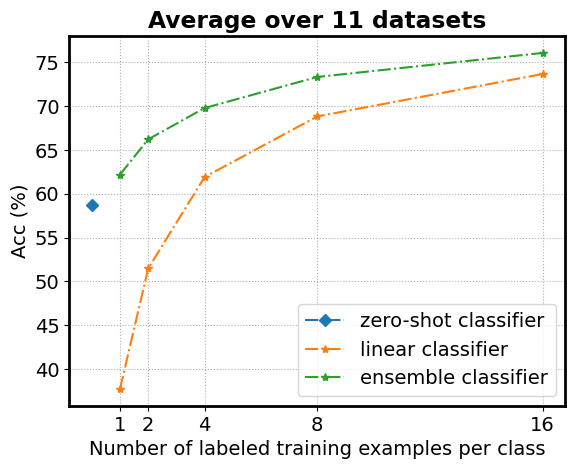

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch
import numpy as np
import math
plt.rcParams.update({'font.size': 14})

X0 = [0]
Y0 = [58.77]

X = [1,2,4,8,16]
linear_Y = [37.75, 51.48, 61.90, 68.81, 73.65]
ensemble_Y = [62.19, 66.20, 69.77, 73.31, 76.05]

fig = plt.figure()
ax = plt.gca()

plt.plot(X0, Y0, marker='D', label='zero-shot classifier', linestyle='-.')
plt.plot(X, linear_Y, marker='*', label='linear classifier', linestyle='-.')
plt.plot(X, ensemble_Y, marker='*', label='ensemble classifier', linestyle='-.')

plt.grid(True, linestyle=':')
plt.xlabel('Number of labeled training examples per class')
plt.ylabel('Acc (%)')
plt.xticks([1, 2, 4, 8, 16])

plt.title("Average over 11 datasets", fontweight="bold")
plt.legend(loc='lower right')
ax.spines['bottom'].set_linewidth(2.0) #设置边框线宽为2.0
ax.spines['left'].set_linewidth(2.0) #设置边框线宽为2.0
ax.spines['top'].set_linewidth(2.0) #设置边框线宽为2.0
ax.spines['right'].set_linewidth(2.0) #设置边框线宽为2.0

plt.show()